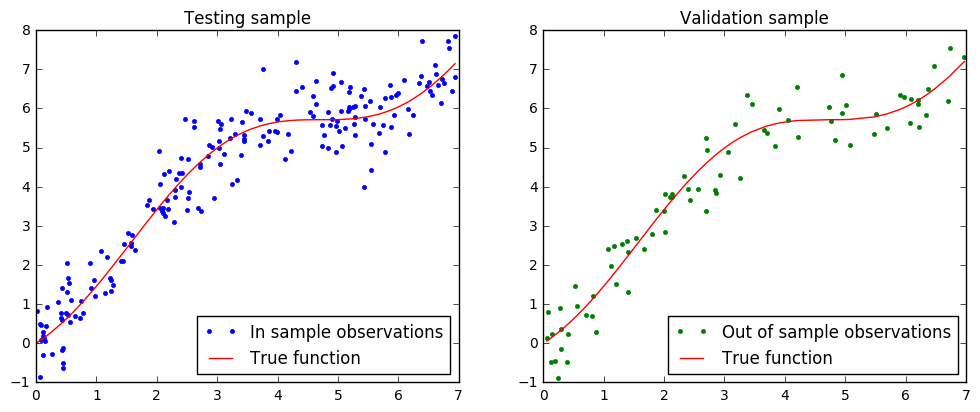

In [236]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
in_sample_x =[random.uniform(0, 400) for i in range(200)]
out_sample_x =[random.uniform(0, 400) for i in range(80)]
#Define input array with angles from 60deg to 300deg converted to radians
in_sample_x = [x*np.pi/180 for x in in_sample_x]
out_sample_x = [x*np.pi/180 for x in out_sample_x]
in_sample_x = np.sort(in_sample_x)
out_sample_x = np.sort(out_sample_x)

np.random.seed(10) 
in_sample_y = 1- np.cos(in_sample_x)+ in_sample_x + np.random.normal(0,0.6,len(in_sample_x))
out_sample_y = 1- np.cos(out_sample_x)+out_sample_x + np.random.normal(0,0.6,len(out_sample_x))
data_in = pd.DataFrame(np.column_stack([in_sample_x,in_sample_y]),columns=['x','y'])
data_out = pd.DataFrame(np.column_stack([out_sample_x,out_sample_y]),columns=['x','y'])

plt.figure(1)
plt.subplot(221)
plt.plot(data_in['x'],data_in['y'],'.',color='blue', label="In sample observations")
plt.plot(data_in['x'],1- np.cos(in_sample_x)+ in_sample_x,color='red', label="True function")
plt.legend(loc = "lower right")
plt.title('Testing sample')
plt.subplot(222)
plt.plot(data_out['x'],data_out['y'],'.', color='green', label="Out of sample observations")
plt.plot(data_out['x'],1- np.cos(out_sample_x)+ out_sample_x,color='red', label="True function")
plt.title('Validation sample')
plt.legend(loc = "lower right")

In [237]:
for i in range(2,40):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data_in[colname] = data_in['x']**i
    data_out[colname] = data_out['x']**i

data_out.head()


,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39
0,0.06,0.14,0.0035,0.00021,1.3e-05,7.5e-07,4.5e-08,2.7e-09,1.6e-10,9.5e-12,...,1.8e-37,1.1e-38,6.3e-40,3.8e-41,2.3e-42,1.3e-43,8e-45,4.8e-46,2.8e-47,1.7e-48
1,0.07,0.79,0.0049,0.00035,2.4e-05,1.7e-06,1.2e-07,8.4e-09,5.9e-10,4.1e-11,...,2.4e-35,1.7e-36,1.2e-37,8.3e-39,5.8e-40,4.1e-41,2.8e-42,2e-43,1.4e-44,9.8e-46
2,0.13,-0.48,0.017,0.0021,0.00027,3.5e-05,4.5e-06,5.8e-07,7.5e-08,9.7e-09,...,1.9e-27,2.5e-28,3.2e-29,4.1e-30,5.3e-31,6.8e-32,8.7e-33,1.1e-33,1.4e-34,1.9e-35
3,0.14,0.24,0.019,0.0027,0.00037,5.1e-05,7.1e-06,9.8e-07,1.4e-07,1.9e-08,...,1.8e-26,2.4e-27,3.4e-28,4.7e-29,6.5e-30,8.9e-31,1.2e-31,1.7e-32,2.4e-33,3.3e-34
4,0.19,-0.46,0.038,0.0074,0.0014,0.00028,5.5e-05,1.1e-05,2.1e-06,4e-07,...,4.9e-22,9.5e-23,1.9e-23,3.6e-24,7e-25,1.4e-25,2.7e-26,5.2e-27,1e-27,2e-28


In [238]:

from sklearn.linear_model import LinearRegression
def linear_regression(data1, data2, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data1[predictors],data1['y'])
    y_pred = linreg.predict(data1[predictors])
    y_pred_out = linreg.predict(data2[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data1['x'],y_pred, color = 'red')
        plt.plot(data1['x'],data1['y'],'.', color ='blue' )
        plt.title('Testing sample: Plot for power: %d'%power)
        plt.subplot(models_to_plot[power]+1)
        plt.tight_layout()
        plt.plot(data1['x'],y_pred, color = 'red')
        plt.plot(data2['x'],data2['y'],'.', color = 'green')
        plt.title('Validation sample: Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data1['y'])**2)/len(y_pred)
    cvrss = sum((y_pred_out-data2['y'])**2)/len(y_pred_out)
    ret = [rss, cvrss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

,rss,cross-rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,...,coef_x_30,coef_x_31,coef_x_32,coef_x_33,coef_x_34,coef_x_35,coef_x_36,coef_x_37,coef_x_38,coef_x_39
model_pow_1,0.84,0.85,1,0.96,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,0.43,0.36,-0.13,2.1,-0.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.4,0.35,-0.49,2.8,-0.45,0.027,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.34,0.29,0.11,0.78,0.92,-0.28,0.022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.34,0.29,0.13,0.71,0.99,-0.31,0.026,-0.00026,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.34,0.29,0.1,0.86,0.77,-0.17,-0.01,0.0044,-0.00023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.34,0.29,0.19,0.11,2.3,-1.5,0.51,-0.1,0.011,-0.00047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.34,0.3,0.012,2.1,-3,4.3,-2.6,0.85,-0.15,0.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.34,0.3,-0.026,2.6,-4.7,6.7,-4.3,1.5,-0.31,0.036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.33,0.3,0.36,-3.4,19,-31,29,-15,5.1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


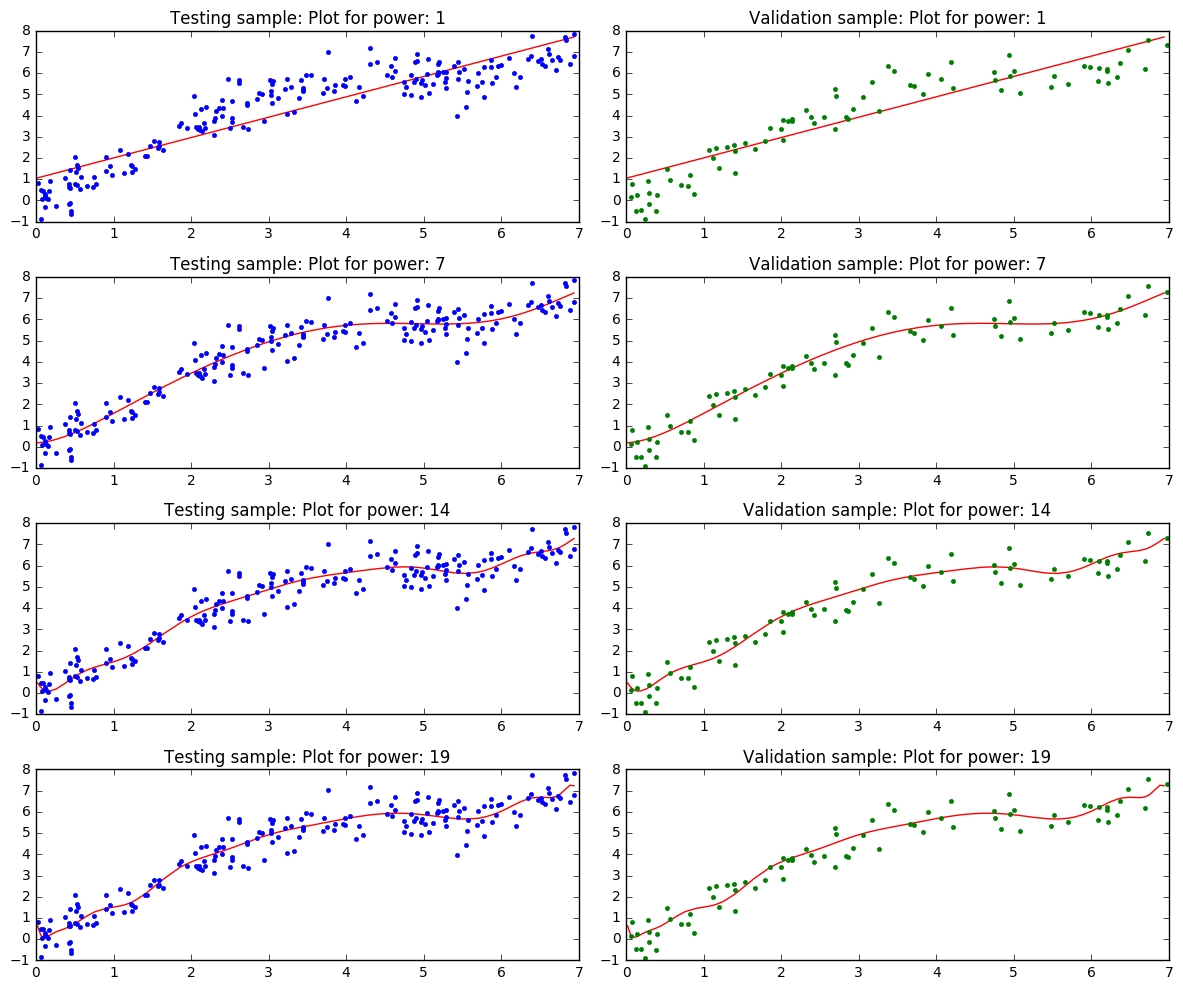

In [239]:
##### Initialize a dataframe to store the results:
col = ['rss', 'cross-rss','intercept'] + ['coef_x_%d'%i for i in range(1,40)]
ind = ['model_pow_%d'%i for i in range(1,40)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:421,7:423,14:425,19:427}

#Iterate through all powers and assimilate results
for i in range(1,40):
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(data_in, data_out, power=i, models_to_plot=models_to_plot)
coef_matrix_simple

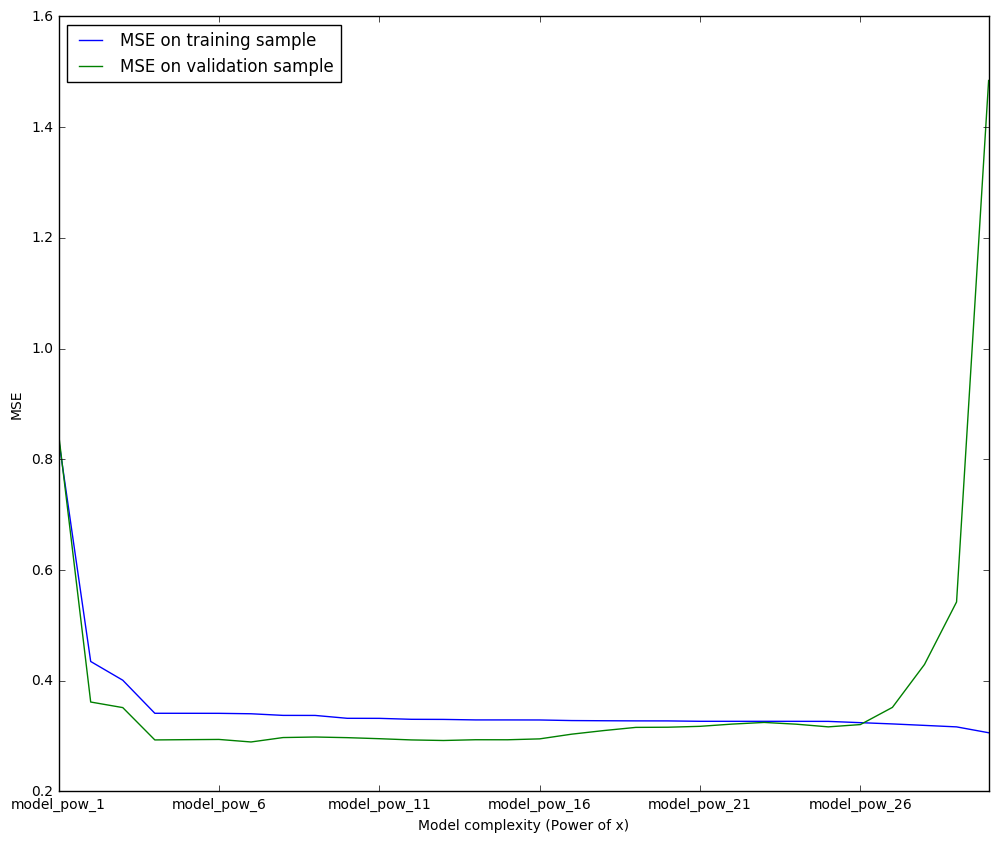

In [250]:
        ax = coef_matrix_simple['rss'][0:30].plot(color = 'blue', label='MSE on training sample')
        coef_matrix_simple['cross-rss'][0:30].plot(ax=ax, color = 'green',  label='MSE on validation sample')
        ax.legend( loc='upper left')
        ax.set_xlabel("Model complexity (Power of x)")
        ax.set_ylabel("MSE")

In [133]:

pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,...,coef_x_15,coef_x_16,coef_x_17,coef_x_18,coef_x_19,coef_x_20,coef_x_21,coef_x_22,coef_x_23,coef_x_24
model_pow_1,64,27,1.7,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,21,4.6,-0.12,1.1,-0.16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,11,3.6,-1.4,2.7,-0.66,0.045,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,4.1,0.88,-0.082,0.014,0.82,-0.26,0.021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,3.6,0.68,0.42,-1.4,2.1,-0.69,0.086,-0.0036,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,3.5,0.76,0.0088,0.1,0.28,0.2,-0.14,0.023,-0.0012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,3.5,0.72,0.14,-0.51,1.2,-0.39,0.073,-0.017,0.0027,-0.00015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,3.4,0.68,0.52,-2.5,4.7,-3.4,1.5,-0.39,0.061,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,3.4,0.69,0.96,-5.1,10,-9.3,5,-1.7,0.34,-0.042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,3.4,0.69,0.59,-2.6,4.1,-1.6,-0.53,0.81,-0.37,0.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
